# Future  Sales Prediction

In [0]:
# Since the downloaded file are .csv.gz files that need to be converted into .csv file 
# Following code snippet converts .csv.gz to .csv format

"""
import gzip
for filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:
  with gzip.open(filename, 'rt') as f:
    data = f.read()
    with open(filename[:-3], 'wt') as f:
      f.write(data)
"""

"\nimport gzip\nfor filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:\n  with gzip.open(filename, 'rt') as f:\n    data = f.read()\n    with open(filename[:-3], 'wt') as f:\n      f.write(data)\n"

In [0]:
import pandas as pd # For EDA
import numpy as np 
np.random.seed(243)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [0]:
df =  pd.read_csv('sales_train.csv')

In [0]:
# lets see first five rows of dataFrame
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [0]:
# Dimension of the the dataframe
df.shape

(2935849, 6)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [0]:
# Convert the datatype of date column into datetime object and sort the dataframe according to date
df.date = pd.to_datetime(df.date)
df = df.sort_values('date')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 109593 to 2898514
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 156.8 MB


In [0]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
109593,2013-01-01,0,46,18616,349.0,1.0
85162,2013-01-01,0,54,11854,199.0,1.0
18128,2013-01-01,0,28,4906,1799.0,1.0
112216,2013-01-01,0,42,2931,99.0,1.0
85141,2013-01-01,0,54,11604,349.0,1.0


In [0]:
# Calculating total number of sales in each months
record = df.groupby("date_block_num")['item_cnt_day'].sum()

In [0]:
record = pd.DataFrame(record)

In [0]:
record = record.rename(columns={'item_cnt_day':'item_cnt_month'})
record.head()

,item_cnt_month
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0


There are 34 months in the dataset now we need to set  a date range of 34 moths starting from 2013-01-01

In [0]:
record.index=pd.date_range(start='2013-01-01',end='2015-10-01',freq='MS') # period of 34 months

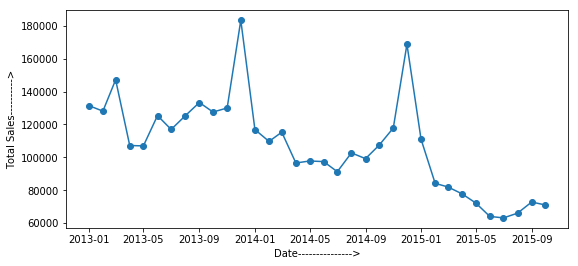

In [0]:
# plot graph
#warnings.filterwarnings('ignore')
plt.figure(figsize=(9,4))
plt.xlabel('Date--------------->')
plt.ylabel('Total Sales---------->')
plt.plot(record,'-o')
plt.show()

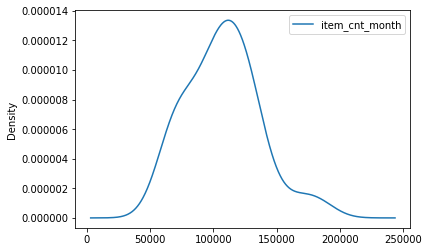

In [0]:
record.plot(kind='kde')

##### It seems that the trend is going down meaning it is non stationary.

## Preparing the dataset for forecasting using fbprophet
fbprophet is a python api which follow sklearn api, used for time series analysis.
The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
record = record.reset_index()

In [0]:
record.head()

,index,item_cnt_month
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [0]:
record.columns

Index(['index', 'item_cnt_month'], dtype='object')

In [0]:
record.columns = ['ds','y']

In [0]:
record.tail(10)

,ds,y
24,2015-01-01,110971.0
25,2015-02-01,84198.0
26,2015-03-01,82014.0
27,2015-04-01,77827.0
28,2015-05-01,72295.0
29,2015-06-01,64114.0
30,2015-07-01,63187.0
31,2015-08-01,66079.0
32,2015-09-01,72843.0
33,2015-10-01,71056.0


In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet(yearly_seasonality=True)

In [0]:
warnings.filterwarnings('ignore')
m.fit(record)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
prediction = m.predict(record)

In [0]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
29,2015-06-01,84639.204649,62501.534551,68765.857489,84639.204649,84639.204649,-19020.217871,-19020.217871,-19020.217871,-19020.217871,-19020.217871,-19020.217871,0.0,0.0,0.0,65618.986778
30,2015-07-01,81383.105437,60976.652955,67040.473005,81383.105437,81383.105437,-17250.624093,-17250.624093,-17250.624093,-17250.624093,-17250.624093,-17250.624093,0.0,0.0,0.0,64132.481344
31,2015-08-01,78018.469586,64796.313713,71558.852554,78018.469586,78018.469586,-9763.113345,-9763.113345,-9763.113345,-9763.113345,-9763.113345,-9763.113345,0.0,0.0,0.0,68255.356241
32,2015-09-01,74653.833734,67422.011183,73657.893590,74653.833734,74653.833734,-4244.873599,-4244.873599,-4244.873599,-4244.873599,-4244.873599,-4244.873599,0.0,0.0,0.0,70408.960135
33,2015-10-01,71397.734523,68345.757293,74229.526121,71397.734523,71397.734523,-18.587229,-18.587229,-18.587229,-18.587229,-18.587229,-18.587229,0.0,0.0,0.0,71379.147294


In [0]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].join(record.y).tail()

,ds,yhat,yhat_lower,yhat_upper,y
29,2015-06-01,65618.986778,62501.534551,68765.857489,64114.0
30,2015-07-01,64132.481344,60976.652955,67040.473005,63187.0
31,2015-08-01,68255.356241,64796.313713,71558.852554,66079.0
32,2015-09-01,70408.960135,67422.011183,73657.893590,72843.0
33,2015-10-01,71379.147294,68345.757293,74229.526121,71056.0


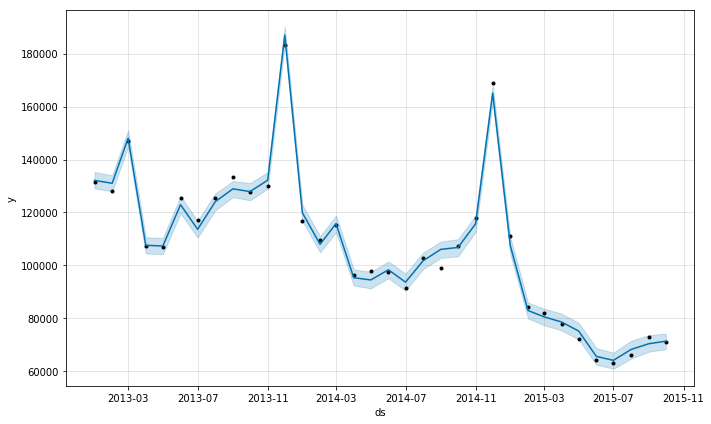

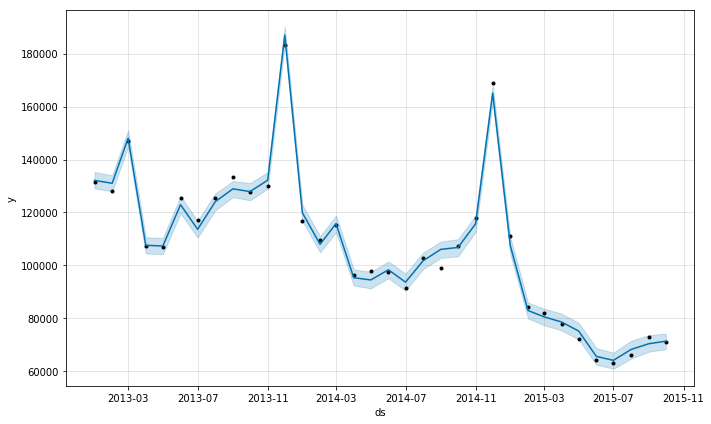

In [0]:
m.plot(prediction)

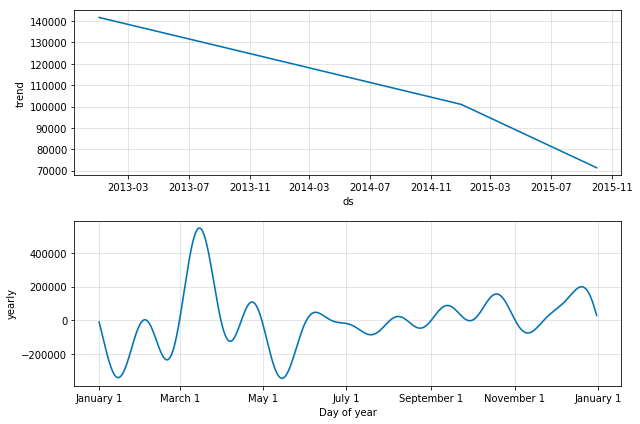

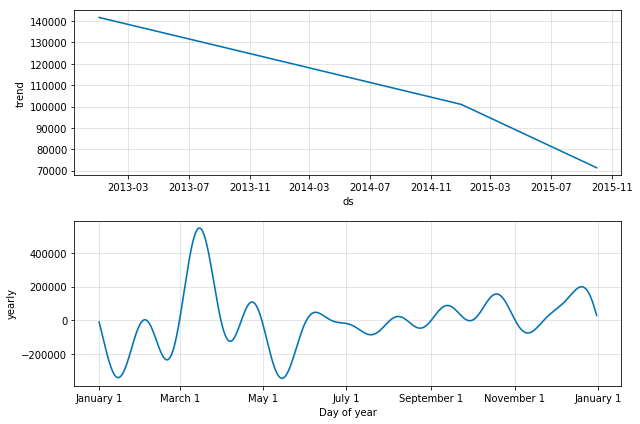

In [0]:
m.plot_components(prediction)

#### Since our goal is to predict the sales for future so we need to extend date for 1 more year(say).

In [0]:
future = m.make_future_dataframe(periods=12,freq='MS',include_history=False)

In [0]:
forecast = m.predict(future)

In [0]:
# seeing the predicted values for the next year with their boundaries values.
forecast[['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
0,83193.957416,79999.429634,86217.375265
1,125513.063181,122556.730338,128714.871259
2,75625.688717,72625.078234,78974.933797
3,40109.144632,36861.543275,43154.834974
4,76664.084927,73635.198203,79919.308822
5,14641.973388,11300.140056,17777.899831
6,12975.524004,9936.303967,16424.498215
7,38673.613771,35242.568927,42074.407935
8,23236.805482,20038.564729,26870.427182
9,34354.104703,30944.538321,37687.208691


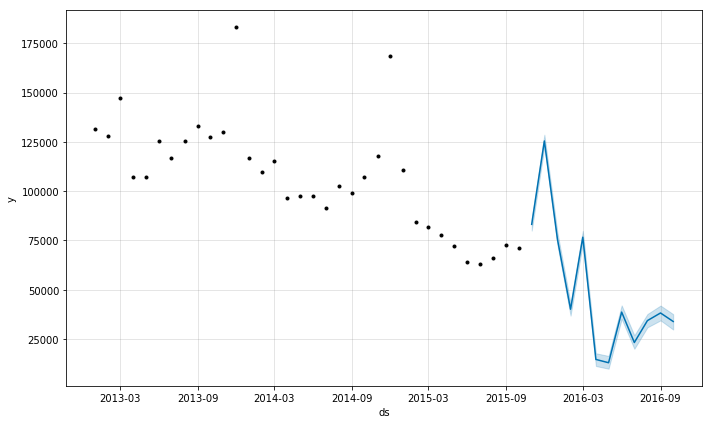

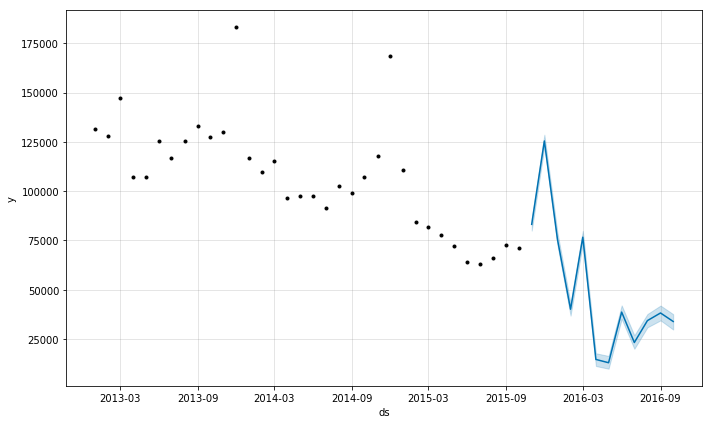

In [0]:
m.plot(forecast)

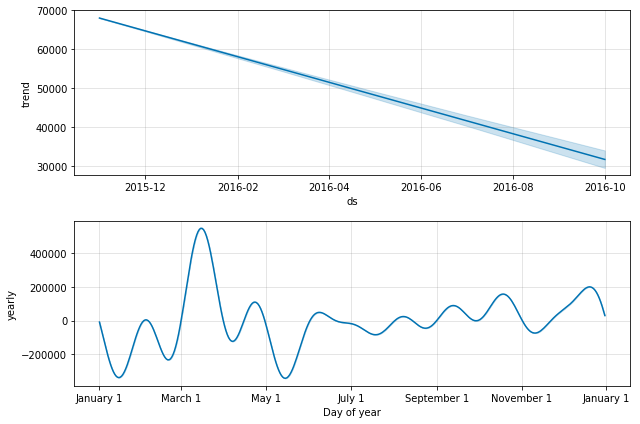

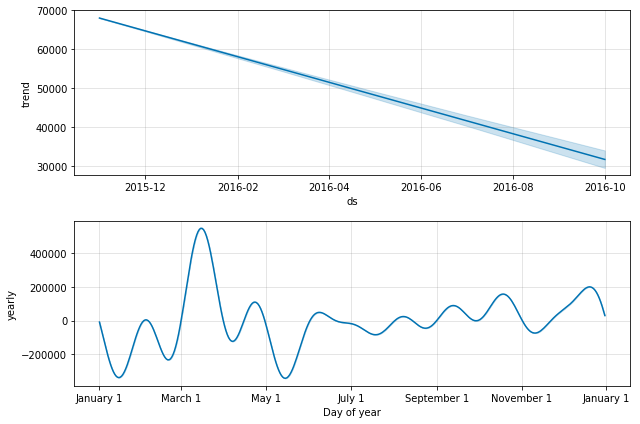

In [0]:
m.plot_components(forecast)

# Thank You
Any query!!!
Email id: hbr8218@gmail.com